In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_excel("data1.xlsx")

In [78]:
data.head(2)

H 라인                 투입시간                   생산일자            파트시리얼  \
0  신U 조립  U  2019-06-01  8:40:08  2019-06-01 오전 9:43:11  19051623310145A   
1  신U 조립  U  2019-06-01  8:40:38  2019-06-01 오전 9:44:13  19051623320146A   

   SRING_Assy_DATA  SEAL_PRESS_LOAD  SEAL_PRESS_DISTANCE  NR_DATA#1  \
0            0.585           36.622              141.399       10.9   
1            0.633           41.016              141.399       10.9   

   NR_DATA#2  ...  IVM_Cover_체결_토크_2  IVM_Cover_체결_토크_3  IVM_Cover_체결_토크_4  \
0       10.8  ...               11.5               11.5               11.5   
1       10.8  ...               11.5               11.5               11.5   

   IVM_Cover_체결_토크_5  IVM_Cover_체결_토크_6  Bottom_다윌핀_압입력_1  Bottom_다윌핀_압입력_2  \
0               11.5               11.5           408.692           432.129   
1               11.5               11.5           474.610           382.325   

   캠스프라켓_체결_토크  완성_리크테스트값                time  
0        107.2     -2.776 2019-06-01 08:40:08  
1        107.4     -1.471 2019-06-01 08:40:38  

[2 rows x 27 columns]

In [68]:
data.rename(columns={'생산일자(완성)':'생산일자'},inplace=True)

In [73]:
data['time'] = data.투입시간.str.replace("오전","")
data['time'] = data.time.str.replace("오후","")

In [80]:
data['product_time'] = data.생산일자.str.replace("오전","")
data['product_time'] = data.product_time.str.replace("오후","")

In [81]:
data.time = pd.to_datetime(data.time)
data.product_time = pd.to_datetime(data.product_time)

In [82]:
data.dtypes

H                              object
라인                             object
투입시간                           object
생산일자                           object
파트시리얼                          object
SRING_Assy_DATA               float64
SEAL_PRESS_LOAD               float64
SEAL_PRESS_DISTANCE           float64
NR_DATA#1                     float64
NR_DATA#2                     float64
NR_DATA#3                     float64
EX_FRT_리크테스트값                 float64
Top_다윌핀_압입력_1                 float64
Top_다윌핀_압입력_2                 float64
Rear_다윌핀_압입력_1                float64
Rear_다윌핀_압입력_2                float64
IVM_Cover_체결_토크_1             float64
IVM_Cover_체결_토크_2             float64
IVM_Cover_체결_토크_3             float64
IVM_Cover_체결_토크_4             float64
IVM_Cover_체결_토크_5             float64
IVM_Cover_체결_토크_6             float64
Bottom_다윌핀_압입력_1              float64
Bottom_다윌핀_압입력_2              float64
캠스프라켓_체결_토크                   float64
완성_리크테스트값                     float64
time        

In [70]:
%matplotlib inline
import pandas_profiling

In [83]:
pandas_profiling.ProfileReport(data)

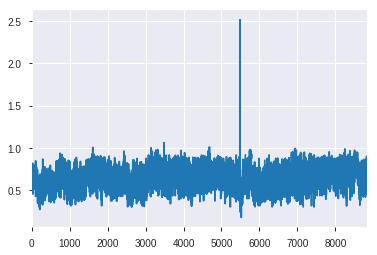

In [84]:
data.SRING_Assy_DATA.plot()

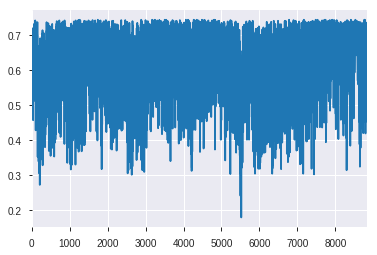

In [91]:
data.loc[data.SRING_Assy_DATA < data.SRING_Assy_DATA.describe()["75%"],"SRING_Assy_DATA"].plot()

In [117]:
data.isnull().sum()

H                        0
라인                       0
투입시간                     0
생산일자                     0
파트시리얼                    0
SRING_Assy_DATA        101
SEAL_PRESS_LOAD        102
SEAL_PRESS_DISTANCE    102
NR_DATA#1              116
NR_DATA#2              116
NR_DATA#3              116
EX_FRT_리크테스트값          117
Top_다윌핀_압입력_1          123
Top_다윌핀_압입력_2          123
Rear_다윌핀_압입력_1         123
Rear_다윌핀_압입력_2         123
IVM_Cover_체결_토크_1      125
IVM_Cover_체결_토크_2      125
IVM_Cover_체결_토크_3      125
IVM_Cover_체결_토크_4      124
IVM_Cover_체결_토크_5      125
IVM_Cover_체결_토크_6      124
Bottom_다윌핀_압입력_1       125
Bottom_다윌핀_압입력_2       125
캠스프라켓_체결_토크            125
완성_리크테스트값              126
time                     0
product_time             0
dtype: int64

In [268]:
sel_col = list(data.dtypes.index[data.dtypes == np.number])

In [270]:
reg_data = data[sel_col]
reg_data = reg_data.dropna(axis=0)

In [271]:
X = reg_data[sel_col]
del X[sel_col[-1]]
y = reg_data[sel_col[-1]]
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
reg_model = LinearRegression()
reg = reg_model.fit(X,y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
#print(est2.summary())

/home/oracle/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


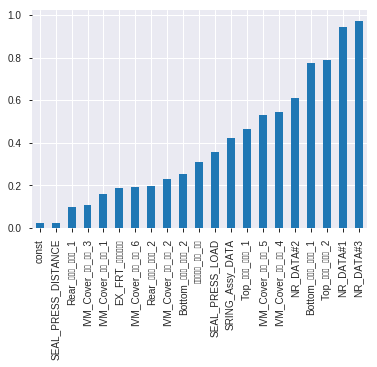

In [166]:
est2.pvalues.sort_values().plot(kind="bar")

In [125]:
reg.score(X,y)

0.0028531922719846614

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmscaler = MinMaxScaler()
stscaler = StandardScaler()

In [139]:
mmscaler.fit(reg_data)
stscaler.fit(reg_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
streg_data = stscaler.transform(reg_data)
mmreg_data = mmscaler.transform(reg_data)

In [153]:
mmX, mmy = mmreg_data[::,0:(mmreg_data.shape[1]-1)] , mmreg_data[::,-1]
stX, sty = streg_data[::,0:(streg_data.shape[1]-1)] , streg_data[::,-1]

In [155]:
mmreg_model = LinearRegression()
streg_model = LinearRegression()
mmreg = mmreg_model.fit(mmX,mmy)
streg = streg_model.fit(stX,sty)
print("MinMax 적용 점수",mmreg.score(mmX,mmy)," Standard 적용점수", streg.score(stX,sty))

MinMax 적용 점수 0.002853192271837779  Standard 적용점수 0.00285319227183789


In [184]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in= float, 
                       threshold_out = float, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [190]:
stepwise_selection(X,y,threshold_in=0.08,threshold_out=0.9)

/home/oracle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  SEAL_PRESS_DISTANCE            with p-value 0.0192955
Add  Rear_다윌핀_압입력_1                 with p-value 0.0734806


['SEAL_PRESS_DISTANCE', 'Rear_다윌핀_압입력_1']

In [216]:
selected_feature = stepwise_selection(X,y,threshold_in=0.04,threshold_out=0.9)
selected_feature.append("완성_리크테스트값")

Add  SEAL_PRESS_DISTANCE            with p-value 0.0193067


/home/oracle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [217]:
selected_feature

['SEAL_PRESS_DISTANCE', '완성_리크테스트값']

In [218]:
X = data[selected_feature]
X = X.dropna(axis=0)

In [219]:
X, y = X.iloc[:,0:1], X.iloc[:,-1]

In [234]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X,y)
lm_model.coef_

array([1925.91973555])

In [238]:
np.sum(np.sqrt((result-y)**2))/len(X)

4.234321670896009

In [249]:
from sklearn.cluster import KMeans
x = data['완성_리크테스트값']
x = np.array(x)
kmeans = KMeans(n_clusters=20, random_state=0).fit(x)

ValueError: Expected 2D array, got 1D array instead:
array=[-2.776 -1.471 -2.841 ... -1.367 -7.885  9.744].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [252]:
pandas_profiling.ProfileReport(data)

In [263]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in= 0.2, 
                       threshold_out = 0.3, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [272]:
stepwise_selection(X,y,threshold_in=0.6, threshold_out=0.9)

/home/oracle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  SEAL_PRESS_DISTANCE            with p-value 0.0192955
Add  Rear_다윌핀_압입력_1                 with p-value 0.0734806
Add  IVM_Cover_체결_토크_3              with p-value 0.111886
Add  IVM_Cover_체결_토크_1              with p-value 0.161283
Add  IVM_Cover_체결_토크_6              with p-value 0.187483
Add  Rear_다윌핀_압입력_2                 with p-value 0.193495
Add  IVM_Cover_체결_토크_2              with p-value 0.21617
Add  EX_FRT_리크테스트값                  with p-value 0.240704
Add  캠스프라켓_체결_토크                    with p-value 0.299738
Add  Bottom_다윌핀_압입력_2               with p-value 0.318909
Add  SEAL_PRESS_LOAD                with p-value 0.384077
Add  Top_다윌핀_압입력_1                  with p-value 0.406442
Add  SRING_Assy_DATA                with p-value 0.423119
Add  IVM_Cover_체결_토크_5              with p-value 0.544092
Add  IVM_Cover_체결_토크_4              with p-value 0.546609


['SEAL_PRESS_DISTANCE',
 'Rear_다윌핀_압입력_1',
 'IVM_Cover_체결_토크_3',
 'IVM_Cover_체결_토크_1',
 'IVM_Cover_체결_토크_6',
 'Rear_다윌핀_압입력_2',
 'IVM_Cover_체결_토크_2',
 'EX_FRT_리크테스트값',
 '캠스프라켓_체결_토크',
 'Bottom_다윌핀_압입력_2',
 'SEAL_PRESS_LOAD',
 'Top_다윌핀_압입력_1',
 'SRING_Assy_DATA',
 'IVM_Cover_체결_토크_5',
 'IVM_Cover_체결_토크_4']